# Reference Code
https://medium.com/visionary-hub/using-lstms-to-predict-future-stock-prices-61f4458fc860

#  Loading Packages 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

# Importing Data Set

In [5]:
import requests

dataset = pd.read_csv('amazn.csv')
#print(dataset)

dataset['Date'] = pd.to_datetime(dataset.Date,format='%m/%d/%Y')
dataset.index = dataset['Date']
# #plt.figure(figsize=(16,8))
# #plt.plot(dataset['Volume'], label='Amount of Stocks')

dataset = dataset.sort_index(ascending=True, axis=0)

dataset2 = pd.DataFrame(index=range(0,len(dataset)),columns=['Date', 'Close'])
for i in range(0,len(dataset)):
    dataset2['Date'][i] = dataset['Date'][i]
    dataset2['Close'][i] = dataset['Close'][i]
    
dataset2.index = dataset2.Date
dataset2['Close']=dataset2['Close'].str.replace(',', '')
dataset2['Close']=dataset2['Close'].str.replace('$', '')
dataset2.drop('Date', axis=1, inplace = True)

dataset3 = dataset2.values 
#print(dataset3)
N=round(0.8*len(dataset))
train = dataset3[0:N, :]
valid = dataset3[N:, :]

# Normalizing/preprocessing data

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data_t = scaler.fit_transform(train)
scaled_data_v =scaler.fit_transform(valid)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data_t[i-60:i,0])
    y_train.append(scaled_data_t[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

X_test = []
for i in range(60,len(scaled_data_v)):
    X_test.append(scaled_data_v[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))


# Building and training Model (Training window 06/5/2017 - 8/29/2021)

In [7]:
model = Sequential()
model.add(LSTM( units=1000, return_sequences = True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=1000))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

947/947 - 1110s - loss: 0.0039


# Making prediction (The prediction window 8/30/2021- 6/2/2022

In [8]:
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)


# Results

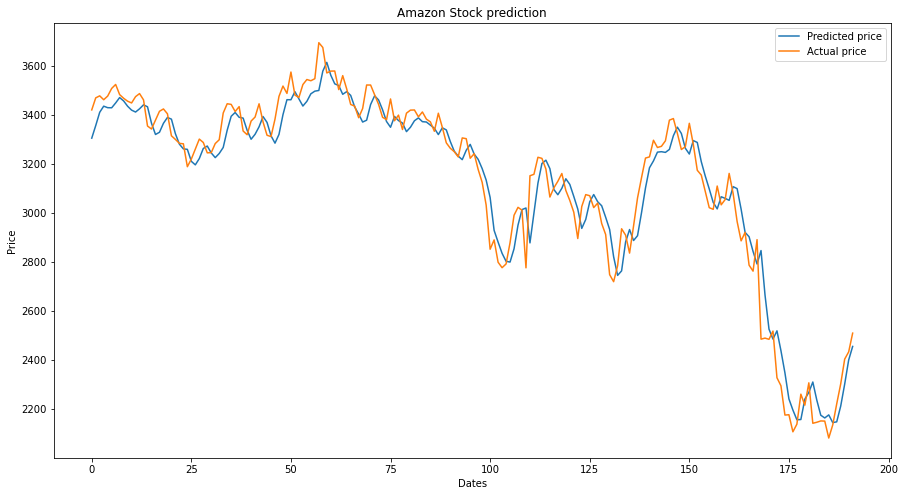

In [38]:
plt.figure(figsize=(15,8))
plt.plot(closing_price,label="Predicted price")
plt.plot(valid2,label='Actual price')
plt.title('Amazon Stock prediction')
plt.xlabel("Dates")
plt.ylabel("Price")
plt.legend(loc="upper right")
plt.show()
